<a href="https://colab.research.google.com/github/anphantt2406/Heritage-Health-Prize/blob/main/2_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/HHP_release3/new_data

Mounted at /content/drive
/content/drive/My Drive/HHP_release3/new_data


# Import Library

In [2]:
import pandas as pd
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns # Library for plotting
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy.stats import norm, skew, spearmanr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2


onehot = OneHotEncoder()

#Import Data

In [3]:
dataY1_df = pd.read_csv('fulldataY1.csv')
dataY2_df = pd.read_csv('fulldataY2.csv')

In [4]:
dataY1_df

,MemberID,AgeAtFirstClaim,Male,Female,Unknown,no_Claims,no_Providers,no_Specialties,no_PCG,no_Procedure,sum_PayDelay,sum_LOS,Specialty_Anesthesiology,Specialty_Diagnostic Imaging,Specialty_Emergency,Specialty_General Practice,Specialty_Internal,Specialty_Laboratory,Specialty_Obstetrics and Gynecology,Specialty_Other,Specialty_Pathology,Specialty_Pediatrics,Specialty_Rehabilitation,Specialty_Surgery,Place_Ambulance,Place_Home,Place_Independent Lab,Place_Inpatient Hospital,Place_Office,Place_Other,Place_Outpatient Hospital,Place_Urgent Care,DSFS_0- 1 month,DSFS_1- 2 months,DSFS_10-11 months,DSFS_11-12 months,DSFS_2- 3 months,DSFS_3- 4 months,DSFS_4- 5 months,DSFS_5- 6 months,...,PCG_PERVALV,PCG_PNCRDZ,PCG_PNEUM,PCG_PRGNCY,PCG_RENAL1,PCG_RENAL2,PCG_RENAL3,PCG_RESPR4,PCG_ROAMI,PCG_SEIZURE,PCG_SEPSIS,PCG_SKNAUT,PCG_STROKE,PCG_TRAUMA,PCG_UTI,Charlson_0,Charlson_1-2,Charlson_3-4,Charlson_5+,Procedure_ANES,Procedure_EM,Procedure_MED,Procedure_PL,Procedure_RAD,Procedure_SAS,Procedure_SCS,Procedure_SDS,Procedure_SEOA,Procedure_SGS,Procedure_SIS,Procedure_SMCD,Procedure_SMS,Procedure_SNS,Procedure_SO,Procedure_SRS,Procedure_SUS,DrugSum,LabSum,TARGET,CLASS
0,210,35,0,0,1,8,4,3,4,5,720,2,0,0,2,0,4,2,0,0,0,0,0,0,0,0,2,0,4,0,0,2,3,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,5,2,0,-1
1,3197,5,0,1,0,5,3,2,2,2,492,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,2,1,1,0,2,0,0,0,1,...,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,-1
2,3889,45,0,1,0,13,7,4,5,5,919,3,0,1,4,0,4,4,0,0,0,0,0,0,0,0,4,0,4,0,0,5,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,9,4,0,0,0,5,0,4,1,0,1,2,0,0,0,0,0,0,0,0,0,30,10,0,-1
3,4187,55,0,1,0,4,3,3,3,2,340,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,61,0,0,-1
4,9063,65,0,1,0,4,2,2,1,2,241,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,99995554,45,1,0,0,35,3,3,3,4,3899,0,0,0,0,2,26,7,0,0,0,0,0,0,0,0,7,0,28,0,0,0,1,0,0,0,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,35,0,0,0,0,4,24,3,0,0,4,0,0,0,0,0,0,0,0,0,0,8,11,0,-1
76034,99996214,45,1,0,0,1,1,1,1,1,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
76035,99997485,15,1,0,0,1,1,1,1,1,130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
76036,99997895,45,1,0,0,14,5,4,6,4,539,0,0,1,0,0,4,7,0,0,0,0,0,2,0,0,7,0,7,0,0,0,2,1,0,0,1,2,2,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14,0,0,0,0,6,0,4,1,0,3,0,0,0,0,0,0,0,0,0,0,0,10,0,-1


In [5]:
dataY2_df

,MemberID,AgeAtFirstClaim,Male,Female,Unknown,no_Claims,no_Providers,no_Specialties,no_PCG,no_Procedure,sum_PayDelay,sum_LOS,Specialty_Anesthesiology,Specialty_Diagnostic Imaging,Specialty_Emergency,Specialty_General Practice,Specialty_Internal,Specialty_Laboratory,Specialty_Obstetrics and Gynecology,Specialty_Other,Specialty_Pathology,Specialty_Pediatrics,Specialty_Rehabilitation,Specialty_Surgery,Place_Ambulance,Place_Home,Place_Independent Lab,Place_Inpatient Hospital,Place_Office,Place_Other,Place_Outpatient Hospital,Place_Urgent Care,DSFS_0- 1 month,DSFS_1- 2 months,DSFS_10-11 months,DSFS_11-12 months,DSFS_2- 3 months,DSFS_3- 4 months,DSFS_4- 5 months,DSFS_5- 6 months,...,PCG_PERVALV,PCG_PNCRDZ,PCG_PNEUM,PCG_PRGNCY,PCG_RENAL1,PCG_RENAL2,PCG_RENAL3,PCG_RESPR4,PCG_ROAMI,PCG_SEIZURE,PCG_SEPSIS,PCG_SKNAUT,PCG_STROKE,PCG_TRAUMA,PCG_UTI,Charlson_0,Charlson_1-2,Charlson_3-4,Charlson_5+,Procedure_ANES,Procedure_EM,Procedure_MED,Procedure_PL,Procedure_RAD,Procedure_SAS,Procedure_SCS,Procedure_SDS,Procedure_SEOA,Procedure_SGS,Procedure_SIS,Procedure_SMCD,Procedure_SMS,Procedure_SNS,Procedure_SO,Procedure_SRS,Procedure_SUS,DrugSum,LabSum,TARGET,CLASS
0,4,5,1,0,0,1,1,1,1,1,43,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
1,210,35,0,0,1,6,3,3,2,3,308,0,0,0,0,0,1,1,0,4,0,0,0,0,0,0,1,0,5,0,0,0,2,0,0,0,0,2,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
2,3197,5,0,1,0,5,4,4,2,4,148,0,0,1,0,0,1,2,0,0,0,1,0,0,0,0,2,0,3,0,0,0,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,-1
3,3457,5,1,0,0,1,1,1,1,1,63,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
4,3713,45,0,1,0,10,5,3,5,3,562,0,0,1,0,7,0,2,0,0,0,0,0,0,0,0,2,0,8,0,0,0,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0,0,0,0,0,2,10,0,0,0,0,5,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,17,9,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71430,99985996,45,0,1,0,5,2,2,2,2,316,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,2,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,-1
71431,99987030,25,1,0,0,4,3,2,1,3,125,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,-1
71432,99995391,65,0,0,1,11,2,2,4,4,533,0,0,0,0,0,6,0,0,0,0,0,0,5,0,0,0,0,11,0,0,0,2,1,0,0,4,2,0,2,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,11,0,0,0,0,3,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,14,1,0,-1
71433,99995554,45,1,0,0,15,3,3,3,4,581,0,0,0,0,2,11,2,0,0,0,0,0,0,0,0,2,0,13,0,0,0,10,2,0,0,1,2,0,0,...,0,0,0,0,0,0,0,2,0,0,0,11,0,0,0,15,0,0,0,0,2,11,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,10,0,-1


#Observation and Selection Features

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


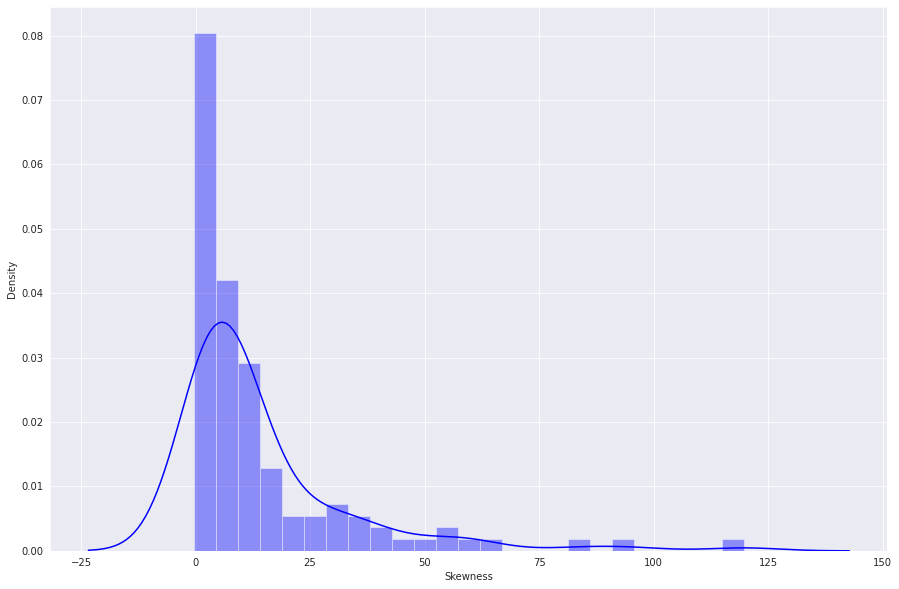

In [6]:
plt.figure(figsize=(15,10))
sns.distplot(dataY1_df.skew(),color='blue',axlabel ='Skewness')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


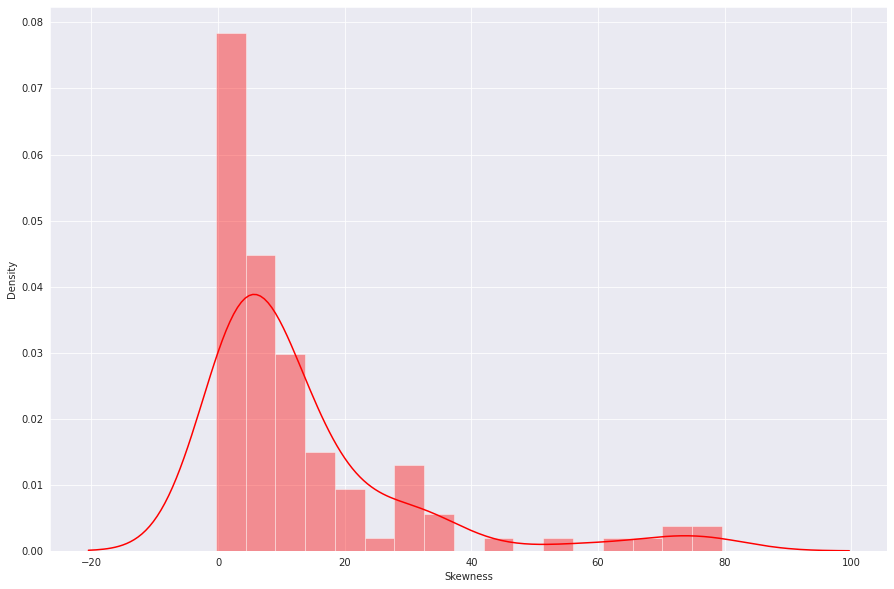

In [7]:
plt.figure(figsize=(15,10))
sns.distplot(dataY2_df.skew(),color='red',axlabel ='Skewness')

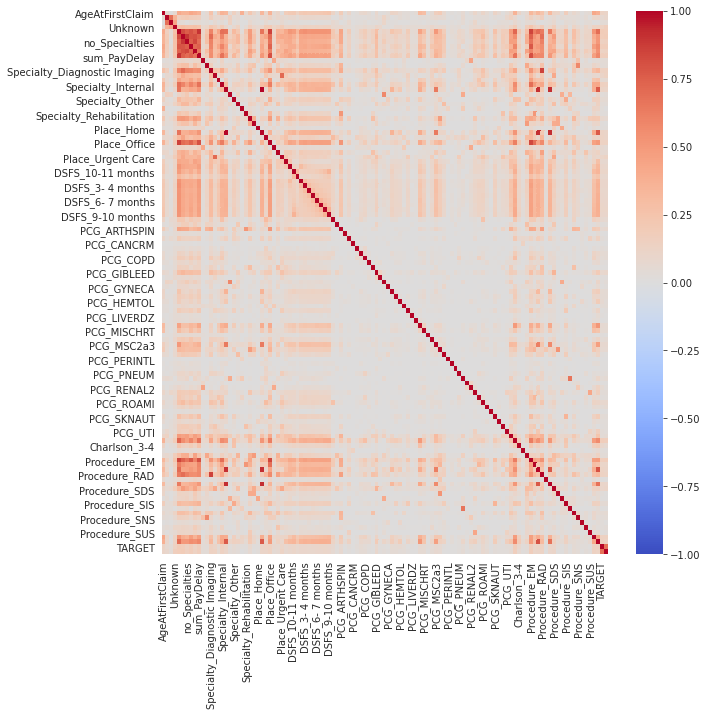

In [8]:
sample = dataY1_df.drop(['MemberID'], axis = 1).sample(frac=0.5, random_state=1)
cor_matrix = sample.corr().abs()
plt.figure(figsize = (10,10))
sns.heatmap(cor_matrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [9]:
y = dataY1_df['TARGET']
X = dataY1_df.loc[:, dataY1_df.columns != 'TARGET']
X = X.drop(['MemberID'], axis = 1)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d [%s] (%f)" % (f + 1, indices[f], X.columns[f], importances[indices[f]]))

Feature ranking:
1. feature 111 [AgeAtFirstClaim] (0.723068)
2. feature 3 [Male] (0.046194)
3. feature 4 [Female] (0.023672)
4. feature 93 [Unknown] (0.018623)
5. feature 9 [no_Claims] (0.017268)
6. feature 13 [no_Providers] (0.015951)
7. feature 5 [no_Specialties] (0.014797)
8. feature 89 [no_PCG] (0.011374)
9. feature 76 [no_Procedure] (0.010721)
10. feature 0 [sum_PayDelay] (0.009851)
11. feature 7 [sum_LOS] (0.007947)
12. feature 109 [Specialty_Anesthesiology] (0.006827)
13. feature 15 [Specialty_Diagnostic Imaging] (0.006601)
14. feature 26 [Specialty_Emergency] (0.006451)
15. feature 27 [Specialty_General Practice] (0.006154)
16. feature 10 [Specialty_Internal] (0.005253)
17. feature 99 [Specialty_Laboratory] (0.005155)
18. feature 96 [Specialty_Obstetrics and Gynecology] (0.004888)
19. feature 30 [Specialty_Other] (0.004837)
20. feature 16 [Specialty_Pathology] (0.003648)
21. feature 33 [Specialty_Pediatrics] (0.003086)
22. feature 110 [Specialty_Rehabilitation] (0.002876)
23. f

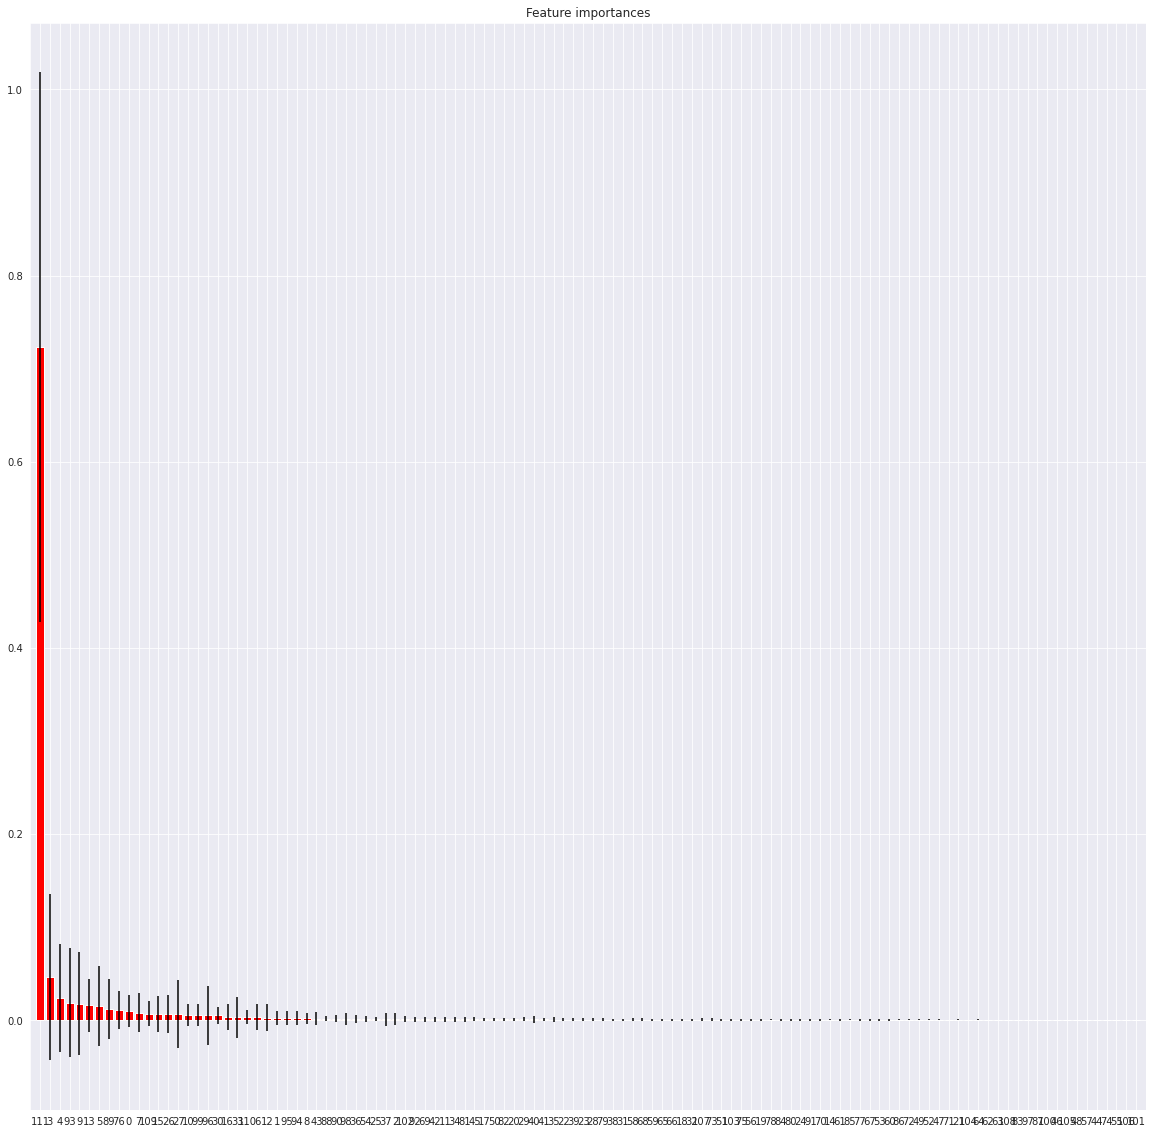

In [11]:
# Plot the feature importances of the forest
plt.figure(figsize = (20,20))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression
test = SelectKBest(score_func=f_regression, k=20)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
features = fit.transform(X)
# Summarize selected features
for n,s in zip(X.columns,test.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))

F-score: 1302.46t for feature AgeAtFirstClaim 
F-score: 370.13t for feature Male 
F-score: 110.43t for feature Female 
F-score: 1427.21t for feature Unknown 
F-score: 2650.26t for feature no_Claims 
F-score: 2446.03t for feature no_Providers 
F-score: 1437.79t for feature no_Specialties 
F-score: 2222.83t for feature no_PCG 
F-score: 1247.80t for feature no_Procedure 
F-score: 2137.43t for feature sum_PayDelay 
F-score: 95.45t for feature sum_LOS 
F-score: 106.66t for feature Specialty_Anesthesiology 
F-score: 1474.00t for feature Specialty_Diagnostic Imaging 
F-score: 878.69t for feature Specialty_Emergency 
F-score: 249.69t for feature Specialty_General Practice 
F-score: 1818.63t for feature Specialty_Internal 
F-score: 1008.43t for feature Specialty_Laboratory 
F-score: 43.63t for feature Specialty_Obstetrics and Gynecology 
F-score: 218.43t for feature Specialty_Other 
F-score: 54.25t for feature Specialty_Pathology 
F-score: 55.61t for feature Specialty_Pediatrics 
F-score: 20.26

In [13]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

for i in range(len(cor_matrix.columns)):
  if (cor_matrix.iloc[i, 111] < 0.1):
    colname = cor_matrix.columns[i] # getting the name of column
    to_drop.append(colname)
    
print('Features have correlation with target < 0.1 and with others > 0.9:', to_drop)

Features have correlation with target < 0.1 and with others > 0.9: ['Place_Independent Lab', 'Procedure_PL', 'Procedure_SCS', 'Male', 'Female', 'sum_LOS', 'Specialty_Anesthesiology', 'Specialty_General Practice', 'Specialty_Obstetrics and Gynecology', 'Specialty_Other', 'Specialty_Pathology', 'Specialty_Pediatrics', 'Specialty_Rehabilitation', 'Specialty_Surgery', 'Place_Ambulance', 'Place_Home', 'Place_Other', 'Place_Outpatient Hospital', 'DSFS_0- 1 month', 'DSFS_1- 2 months', 'DSFS_11-12 months', 'DSFS_2- 3 months', 'DSFS_3- 4 months', 'DSFS_4- 5 months', 'DSFS_5- 6 months', 'DSFS_9-10 months', 'PCG_AMI', 'PCG_APPCHOL', 'PCG_ARTHSPIN', 'PCG_CANCRA', 'PCG_CANCRB', 'PCG_CANCRM', 'PCG_CATAST', 'PCG_CHF', 'PCG_COPD', 'PCG_FLaELEC', 'PCG_FXDISLC', 'PCG_GIBLEED', 'PCG_GIOBSENT', 'PCG_GYNEC1', 'PCG_GYNECA', 'PCG_HEART2', 'PCG_HEART4', 'PCG_HEMTOL', 'PCG_HIPFX', 'PCG_INFEC4', 'PCG_LIVERDZ', 'PCG_METAB1', 'PCG_METAB3', 'PCG_MISCHRT', 'PCG_MISCL1', 'PCG_MISCL5', 'PCG_MSC2a3', 'PCG_NEUMENT', 'P

In [14]:
for col in to_drop:
  dataY1_df = dataY1_df.drop([col], axis = 1)

In [15]:
%cd /content/drive/My Drive/HHP_release3/new_data/

/content/drive/My Drive/HHP_release3/new_data


In [ ]:
dataY1_df.to_csv('FeatureSelection_data.csv', index=False)